In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite (Connect to SQLite database)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model.
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0.5, 1.0, 'Honolulu, HI Annual Rainfall')

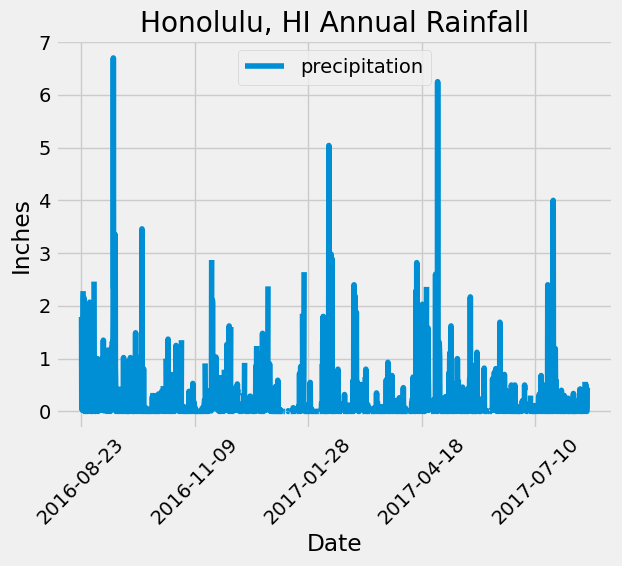

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
measurement_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rainfall_df = pd.DataFrame(measurement_results, columns=("date", "precipitation"))

# Sort the dataframe by date
rainfall_df = rainfall_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date", y="precipitation", rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Honolulu, HI Annual Rainfall")

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
rainfall_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                 filter(Measurement.station == "USC00519281").all()
temp_min_max_avg                                                                                                

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Honolulu, HI Annual Temperature Frequencies')

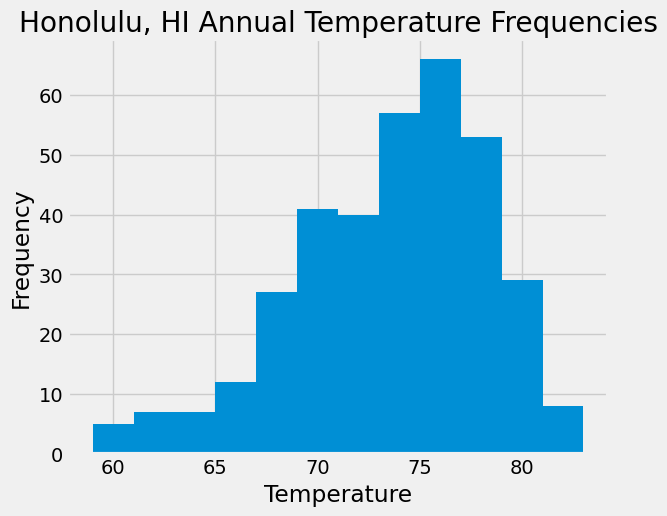

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

station_results = session.query(Measurement.tobs).\
                    filter(Measurement.date >= previous_year).\
                    filter(Measurement.station == "USC00519281").all()
station_results

annual_temperature_df = pd.DataFrame(station_results, columns=["tobs"])

annual_temperature_df.plot.hist(bins=12, legend=False)
plt.tight_layout()
plt.xlabel("Temperature")
plt.title("Honolulu, HI Annual Temperature Frequencies")



# Close Session

In [72]:
# Close Session
session.close()